In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
def categorize_pval(df, col= '-log10(pval)'):
    
    conditions  = [ df[col] < 1, 
                   (df[col] >= 1) & (df[col]< 2), 
                   (df[col] >= 2) & (df[col]< 3), 
                   (df[col] >= 3) & (df[col]< 4),
                  df[col] >= 4]
    choices     = [ "< 1", '[1,2)', '[2,3)', '[3,4)', '>= 4' ]
    df["-log10(pval) bins"] = np.select(conditions, choices, default=np.nan)
def chip_graph(df, title, save = False):
    choices     = [ "< 1", '[1,2)', '[2,3)', '[3,4)', '>= 4' ]
    plt.figure(figsize=(7, 5))
    ax = sns.barplot(data=df, x='-log10(pval) bins', 
                y = 'counts', hue="ATACid", order = choices)
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1),title='ATACseq Cell Line', fontsize=20)
    plt.setp(ax.get_legend().get_title(), fontsize='20')

    ax.set_title(title, fontsize=25)

    plt.xlabel('-log10(p-value) Bins',fontsize=20)
    sns.despine()
    plt.ylabel('Counts',fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=20)
    if save == True:
        atac_graph_out = '/Users/fzheng/Library/CloudStorage/GoogleDrive-fzheng@broadinstitute.org/Shared drives/GPP Cloud /R&D/People/Fengyi/rule_set/crispri/figure/2023/CRISPRi/ATACseq/'
        plt.savefig(atac_graph_out + title + '.png',
                   dpi = 1000, bbox_inches='tight')

In [3]:
in_path = '/Users/fzheng/Library/CloudStorage/GoogleDrive-fzheng@broadinstitute.org/Shared drives/GPP Cloud /R&D/People/Fengyi/rule_set/crispri/data/2024/ATAC/Pval/'
StomachFemalePval = pd.read_csv(in_path + 'StomachFemalePval_v2.csv')
StomachFemalePval['ATACid'] = 'StomachFemale'

K562Pval = pd.read_csv(in_path + 'K562Pval_v2.csv')
K562Pval['ATACid'] = 'K562'

HCT116Pval = pd.read_csv(in_path + 'HCT116Pval_v2.csv')
HCT116Pval['ATACid'] = 'HCT116'

A549Pval = pd.read_csv(in_path + 'A549Pval_v2.csv')
A549Pval['ATACid'] = 'A549'

Panc1Pval = pd.read_csv(in_path + 'Panc1Pval_v2.csv')
Panc1Pval['ATACid'] = 'Panc1'

MCF7Pval = pd.read_csv(in_path + 'MCF7Pval_v2.csv')
MCF7Pval['ATACid'] = 'MCF7'

HepG2Pval = pd.read_csv(in_path + 'HepG2Pval_v2.csv')
HepG2Pval['ATACid'] = 'HepG2'

GM12878Pval = pd.read_csv(in_path + 'GM12878Pval_v2.csv')
GM12878Pval['ATACid'] = 'GM12878'

StomachMalePval = pd.read_csv(in_path + 'StomachMalePval_v2.csv')
StomachMalePval['ATACid'] = 'StomachMale'



In [4]:
ATACdf = pd.concat([StomachMalePval, GM12878Pval,
                   HepG2Pval, MCF7Pval,
                   Panc1Pval, A549Pval,
                   HCT116Pval, K562Pval,
                   StomachFemalePval])
ATACdf.DataSetID.value_counts()

NunezK562Kox1        3052
InHouseA549Kox1      1270
InHouseHCT116Kox1    1270
InHouseHCT116Zim3    1270
InHouseA549Zim3      1270
GilbertK562Kox1       324
Name: DataSetID, dtype: int64

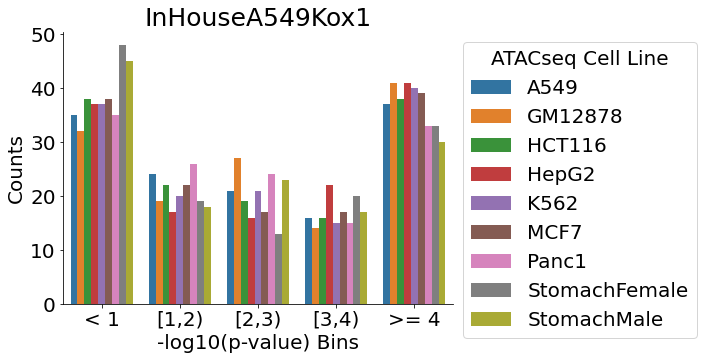

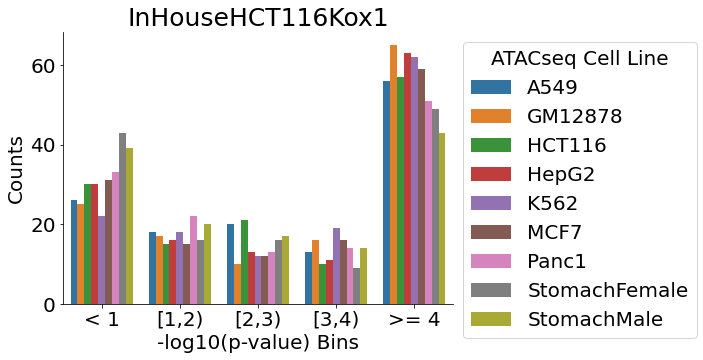

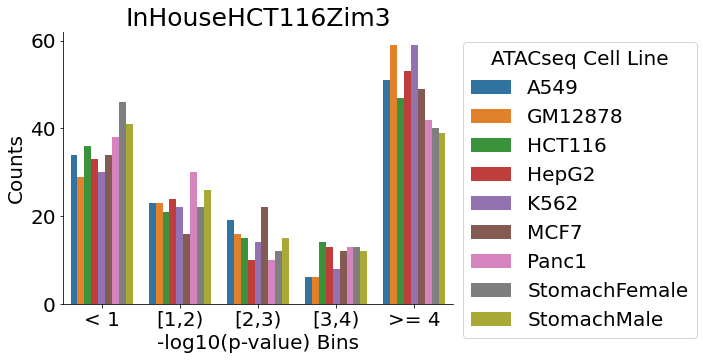

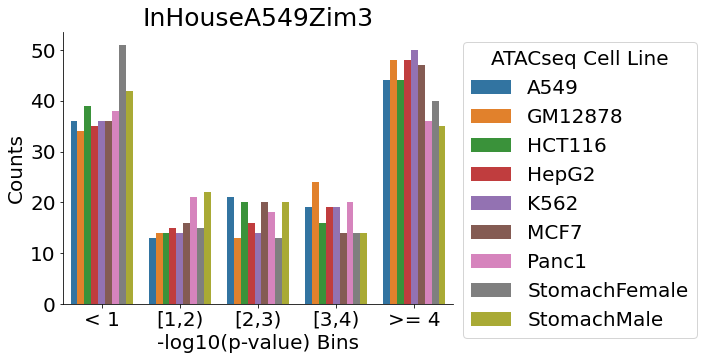

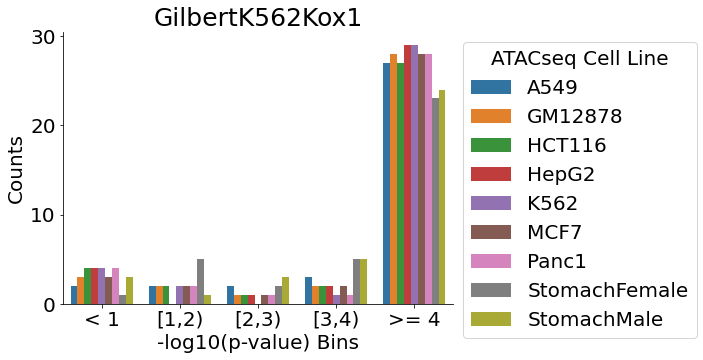

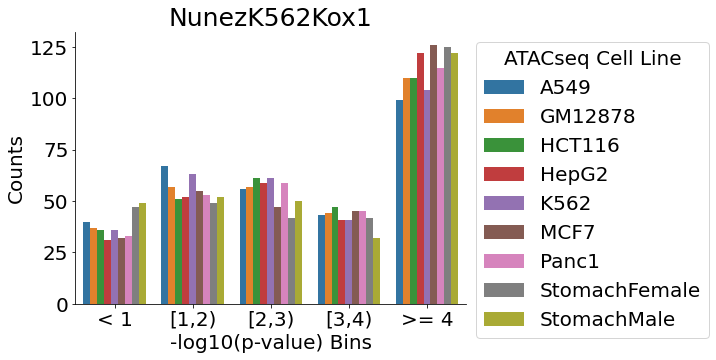

In [5]:
for dataset in ATACdf.DataSetID.unique():
    select_pval = ATACdf[ATACdf.DataSetID == dataset]
    select_pval = select_pval.groupby('Gene').filter(lambda g: len(g) >= 9)
    select_pval['-log10(pval)'] = -np.log10(select_pval['Pval'])
    categorize_pval(select_pval)
    select_count = pd.DataFrame(select_pval.groupby(['-log10(pval) bins', 'ATACid']).size().reset_index(name='counts'))
    chip_graph(select_count, dataset)

